In [37]:
#!pip install praw

#### Plan:
1. Get data from reddit using reddit API and PRAW.
2. Convert that data to a dataframe.
3. Convert the data to CSV to annotate.

In [4]:
import praw
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
cmap = sns.cm.mako_r


### Step 1: Get data from reddit using reddit API and PRAW.

In [3]:
reddit = praw.Reddit(client_id="Mrj1t7mEvAWXvwOFE_iRNA",
                     client_secret="vAQXpZuXXIU2zB_G3XXzlTLAXxVxmQ", 
                     user_agent="my user agent")

In [91]:
# we will get title and body of the post
post_dict = {"id":[],"title" : [],"body" : [],"timestamp": []}

On research, Reddit uses UNIX timestamps to format date and time.
We need to convert that into date and time

In [92]:
for submission in reddit.subreddit("Anxiety").new(limit=1000):
    x=dt.datetime.fromtimestamp(submission.created)
    #last 3 months data
    if(x.month==6):
        print("Condition Matched, Stopping...")
        break
    post_dict["id"].append(submission.id)
    post_dict["title"].append(submission.title)
    post_dict["body"].append(submission.selftext)
    post_dict["timestamp"].append(x)

### Setp 2: Convert that data to a dataframe.

In [93]:
post_data = pd.DataFrame(post_dict)

In [94]:
post_data.head()

,id,title,body,timestamp
0,pwetst,Tightness in my neck and palpitations,I have been having spasms in my eye constantly...,2021-09-27 16:42:18
1,pwep2s,Anxiety attack and suicidal thoughts.,I had gynecomastia surgery about a month and h...,2021-09-27 16:33:24
2,pvs90i,Beer reduces my anxiety.,Hi Please help me I ask for your advice.\n\nI ...,2021-09-26 17:13:43
3,pw4t77,my roommate and her friends have been telling ...,So i just got a roommate who’s very outgoing a...,2021-09-27 04:54:18
4,pwa59i,Fear of being drugged or poisoned???,I just wanted to know if anybody else has an i...,2021-09-27 10:29:08


In [95]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         992 non-null    object        
 1   title      992 non-null    object        
 2   body       992 non-null    object        
 3   timestamp  992 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 31.1+ KB


In [96]:
post_data.tail()

,id,title,body,timestamp
987,pt68mm,Anyone else do this?,Not all the time but if i have allot going on ...,2021-09-22 17:43:25
988,pt67qk,I don't answer the phone unless I'm mentally p...,"Which I usually am not, if I'm not expecting a...",2021-09-22 17:41:56
989,pt63s3,Honestly I want to be fired now,This is hell I woke up too late because I forg...,2021-09-22 17:35:04
990,pt616u,Coping with changing events in life,"Hey guys, \n\nIm a long time Follower of this ...",2021-09-22 17:30:47
991,pt5whu,Emotionally unstable,How do you guys deal with anxiety? People maki...,2021-09-22 17:22:36


In [97]:
print(post_data.describe())

            id                                      title body  \
count      992                                        992  992   
unique     992                                        984  962   
top     pw9d4x  Any alternate other than antidepressants?        
freq         1                                          2   24   
first      NaN                                        NaN  NaN   
last       NaN                                        NaN  NaN   

                  timestamp  
count                   992  
unique                  989  
top     2021-09-24 23:04:59  
freq                      2  
first   2021-09-22 09:38:30  
last    2021-09-27 16:42:18  


In [98]:
post_data.isnull().sum()

id           0
title        0
body         0
timestamp    0
dtype: int64

In [99]:
# Replace empty string with NaN
df = post_data.replace(r'^\s*$', np.nan, regex=True)

In [100]:
df.isnull().sum()

id            0
title         0
body         24
timestamp     0
dtype: int64

In [102]:
# Now we will manaualy annoate the data.
df.to_csv('data_praw.csv',index=False)

In [103]:
# Custom function to mark it 0 or 1
len(df)

992

In [109]:
df["id"].count()

992

In [15]:
df = pd.read_csv ('data_praw.csv')

In [16]:
df.head()

,id,title,body,timestamp
0,pwetst,Tightness in my neck and palpitations,I have been having spasms in my eye constantly...,2021-09-27 16:42:18
1,pwep2s,Anxiety attack and suicidal thoughts.,I had gynecomastia surgery about a month and h...,2021-09-27 16:33:24
2,pvs90i,Beer reduces my anxiety.,Hi Please help me I ask for your advice.\n\nI ...,2021-09-26 17:13:43
3,pw4t77,my roommate and her friends have been telling ...,So i just got a roommate who’s very outgoing a...,2021-09-27 04:54:18
4,pwa59i,Fear of being drugged or poisoned???,I just wanted to know if anybody else has an i...,2021-09-27 10:29:08


### Text Preprocessing

In [17]:
!pip install wordcloud

In [18]:
import re
from nltk import word_tokenize, corpus
import nltk
nltk.download('words')
english_words = set(corpus.words.words())
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [19]:
# we will drop the NaN titles and bodies
reddit_title = df['title'].dropna()
reddit_body = df['body'].dropna()

In [20]:
import re
# Function to clean text
def clean_text_date(text):
    text = text.lower()
    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)
    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)
    # Remove all the special characters except '.'
    text = re.sub('[^.a-zA-Z0-9 \n\.]', '', text)
    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text
# Text Preprocessing
reddit_title = reddit_title.apply(lambda x : clean_text_date(x))
reddit_body = reddit_body.apply(lambda x : clean_text_date(x))

In [21]:
# Looks clean now!
reddit_body[3]

'so just got roommate whos very outgoing and pretty straight forward about stuff. we often hang out smoke drink etc together. shes been always telling me to stop saying sorry so much and that need more confidence. apparently her friends agree as well that saying sorry so much makes me too nice and that ppl will walk all over me. already knew this but its so hard to not say sorry for everything just feel like im the issue for everything. like we were at club last night and just got so anxious had to leave and feel bad bc they helped me lot but if wasnt socially anxious wouldnt be having these issues. like want to have self confidence want to stop thinking im ugly and annoying but its so hard. ppl dont realize that having toxic parentschildhoods really fuck you up'

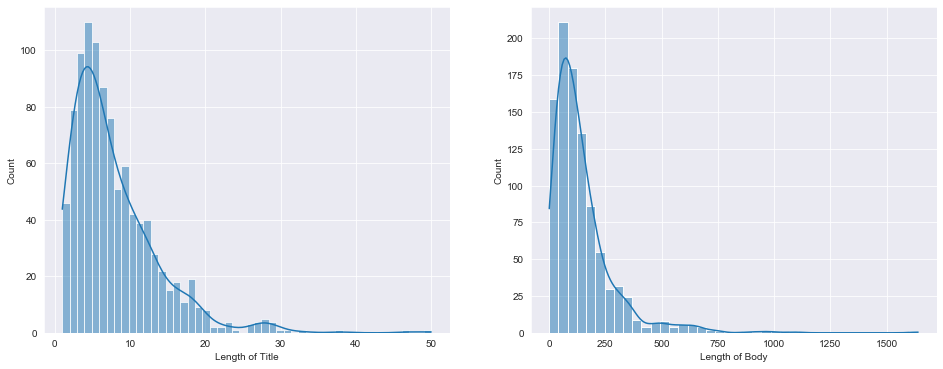

In [22]:
# Lets plot the length of words in title and body
title_length = [len(word_tokenize(text)) for text in reddit_title]
body_length = [len(word_tokenize(text)) for text in reddit_body]
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(16,6))
sns.histplot(title_length, bins=50, kde=True, ax=axis1)
sns.histplot(body_length, bins=40, kde=True, ax=axis2)
axis1.set_xlabel("Length of Title")
axis2.set_xlabel("Length of Body")

plt.show()

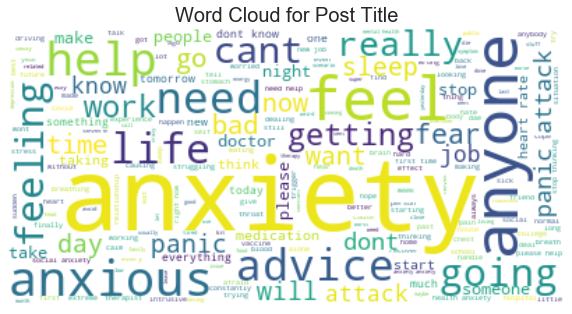

In [23]:

# WordCloud for Title of the Post
word_tokens = [word_tokenize(text) for text in reddit_title]
word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "
        
# Updating some of the Words into Stopwords 
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10,20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Title", fontsize=20)
plt.axis('off')
plt.show()

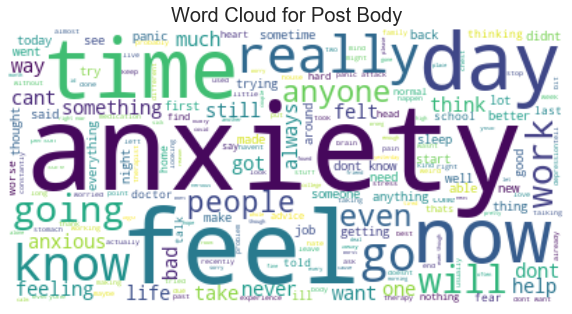

In [24]:
# WordCloud for Body of the Post
word_tokens = [word_tokenize(text) for text in reddit_body]

word_cloud_string = ""

for word_list in word_tokens:
    for word in word_list:
        if word.lower() in english_words:
            word_cloud_string += word + " "
        
# Updating some of the Words into Stopwords 
description_stopwords = set(STOPWORDS)

my_word_cloud = WordCloud(background_color='white',stopwords=description_stopwords).generate(word_cloud_string)
plt.figure(figsize=(10,20))
plt.imshow(my_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for Post Body", fontsize=20)
plt.axis('off')
plt.show()

In [25]:
reddit_body[0]

'i have been having spasms in my eye constantly and tremors in my hand for quite some time. did some research and came to the conclusion that it can happen due to normal stress. but im worried. feel lot of tightness in my neck usually. dealing with heart palpitations as wellthough its not severe imo. anybody else who might have faced the same. how did you work around this'

In [26]:
from nltk.tokenize import sent_tokenize

In [27]:
reddit_sentences = {'sentences':[]}

In [28]:
for row in reddit_body:
    sentence = sent_tokenize(row)
    for text in sentence:
        num = len(word_tokenize(text))
        if(num>5):
            reddit_sentences["sentences"].append(text)

In [29]:
reddit_sentences = pd.DataFrame(reddit_sentences)

In [55]:
reddit_sentences

,sentences
0,i have been having spasms in my eye constantly...
1,did some research and came to the conclusion t...
2,feel lot of tightness in my neck usually.
3,dealing with heart palpitations as wellthough ...
4,anybody else who might have faced the same.
...,...
6933,tried neutral face distraction pinching myself...
6934,feel immense pain when im emotionally hurt sta...
6935,it helped but made me even more miserable.
6936,stopped doing that and started smoking cigaret...


In [150]:
reddit_sentences_500=reddit_sentences.sample(n = 500, replace = False,random_state=42) 

In [151]:
reddit_sentences_500.reset_index(drop=True,inplace = True)

In [152]:
reddit_sentences_500[200:500]

,sentences
200,he says that if he can not care for me because...
201,so we create stories in our minds to feel sens...
202,dont qualify as fitting the dsm5 diagnosis for...
203,going to work every day is so outside my comfo...
204,and ive had those calls in the past when ive a...
...,...
495,im depressed but do not believe have major dep...
496,on my last day yesterday broke my years long s...
497,often our fear of panic attacks makes the prob...
498,its not much but writing has always been my ou...


In [153]:
reddit_sentences_200 = reddit_sentences_500[0:200]
reddit_sentences_300 = reddit_sentences_500[200:500]

In [154]:
# We will use excel to manually annoate the data
# reddit_sentences_200.to_csv('reddit_sentences_200.csv',index=False)

In [155]:
# reading our manually annoted data
df = pd.read_csv('reddit_sentences_200.csv')

In [156]:
df

,sentences,Anxious
0,wont go fully into detail as am tired of typin...,1
1,each day thought about quitting but told mysel...,1
2,only wee bits come out and when it does its so...,1
3,could it be something as simple as tornstraine...,0
4,he didnt comment just kept talking like nothin...,0
...,...,...
195,know my experience isnt how everyones is going...,0
196,though am still avoiding places where have had...,1
197,fantasized about suicide constantly and took b...,1
198,can anxiety cause breathless full day and bloa...,1


Removing stopwords

In [157]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
# In our 200 sentences 
df['sentences'] = df['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# In our 300 sentences
reddit_sentences_300['sentences'] = reddit_sentences_300['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
df['sentences'].head()

0    wont go fully detail tired typing various places.
1    day thought quitting told push sake career stu...
2    wee bits come soft im constipated ive eating h...
3    could something simple tornstrained muscle tor...
4    didnt comment kept talking like nothing happened.
Name: sentences, dtype: object

Applying Stematization

In [159]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['sentences']= df['sentences'].apply(lambda x: stemming_on_text(x))
reddit_sentences_300['sentences'] = reddit_sentences_300['sentences'].apply(lambda x: stemming_on_text(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
df['sentences'].head()

0    wont go fully detail tired typing various places.
1    day thought quitting told push sake career stu...
2    wee bits come soft im constipated ive eating h...
3    could something simple tornstrained muscle tor...
4    didnt comment kept talking like nothing happened.
Name: sentences, dtype: object

In [161]:
reddit_sentences_300['sentences'].head()

200       says care state theres point staying together.
201       create stories minds feel sense control lives.
202    dont qualify fitting dsm5 diagnosis sad anymor...
203    going work every day outside comfort zone get ...
204    ive calls past ive answered even though ive en...
Name: sentences, dtype: object

In [162]:
reddit_sentences_300['sentences']=reddit_sentences_300['sentences'].apply(lambda x: x.split())
df['sentences']=df['sentences'].apply(lambda x: x.split())
df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentences,Anxious
0,"[wont, go, fully, detail, tired, typing, vario...",1
1,"[day, thought, quitting, told, push, sake, car...",1
2,"[wee, bits, come, soft, im, constipated, ive, ...",1
3,"[could, something, simple, tornstrained, muscl...",0
4,"[didnt, comment, kept, talking, like, nothing,...",0


### Machine Learning

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['sentences'],df['Anxious'],test_size=0.2,random_state=42)

In [167]:
# lets see shapes of our data
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((160,), (160,), (40,), (40,))

In [170]:
x_train=x_train.apply(lambda x: ' '.join(x))
x_test=x_test.apply(lambda x: ' '.join(x))

In [178]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1000


In [179]:
vectoriser.get_feature_names()

['20',
 'able',
 'ago',
 'almost',
 'already',
 'also',
 'always',
 'another',
 'anxiety',
 'anxiety much',
 'anxious',
 'anybody',
 'anyone',
 'anyone tips',
 'anything',
 'around',
 'ask',
 'attack',
 'attacks',
 'average',
 'away',
 'back',
 'bad',
 'balance',
 'bc',
 'beats',
 'become',
 'behind',
 'better',
 'brain',
 'breathless',
 'brother',
 'call',
 'called',
 'calm',
 'came',
 'cant',
 'care',
 'cause',
 'caused',
 'chest',
 'class',
 'come',
 'comment',
 'constantly',
 'control',
 'could',
 'covid',
 'coworker',
 'coworkers',
 'currently',
 'daily',
 'day',
 'days',
 'deal',
 'describe',
 'developed',
 'diagnosed',
 'didnt',
 'disorder',
 'doctor',
 'doesnt',
 'dont',
 'dont know',
 'dont want',
 'drink',
 'drive',
 'driving',
 'due',
 'early',
 'eat',
 'edge',
 'either',
 'else',
 'end',
 'energy',
 'escape',
 'even',
 'even though',
 'ever',
 'ever since',
 'every',
 'every time',
 'everyone',
 'everything',
 'failed',
 'family',
 'fear',
 'feel',
 'feel like',
 'feeling',

In [185]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

In [81]:
# Now will implement some classification models 

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

In [259]:
# To evaluate our models I created a function to make our work easy
def model_evaluation(model,roc=False):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    print ("Train accuracy ={:.2f}%".format(model.score(x_train,y_train)*100))
    print ("Test accuracy ={:.2f}%".format(model.score(x_test,y_test)*100))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True).set_title("Confusion Matrix")
    if roc:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_cnb)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC CURVE')
        plt.legend(loc="lower right")
        plt.show()
    return y_pred

### Model-1 ComplementNB (Naive Bayes)

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.69      0.87      0.77        23

    accuracy                           0.70        40
   macro avg       0.71      0.67      0.67        40
weighted avg       0.71      0.70      0.69        40

Train accuracy =100.00%
Test accuracy =70.00%


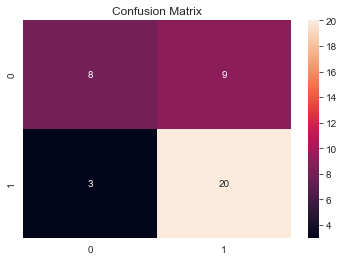

In [301]:
cnb = ComplementNB()
cnb.fit(x_train, y_train)
y_pred_cnb = model_evaluation(cnb)

### Model-2 Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        17
           1       0.59      1.00      0.74        23

    accuracy                           0.60        40
   macro avg       0.79      0.53      0.43        40
weighted avg       0.76      0.60      0.47        40

Train accuracy =99.38%
Test accuracy =60.00%


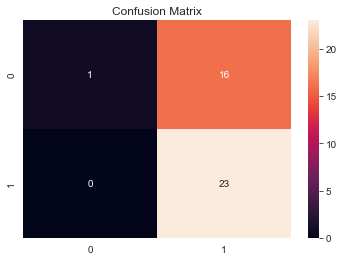

In [302]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
y_pred_lr=model_evaluation(LRmodel)

### Model-3 SVC

              precision    recall  f1-score   support

           0       0.83      0.29      0.43        17
           1       0.65      0.96      0.77        23

    accuracy                           0.68        40
   macro avg       0.74      0.63      0.60        40
weighted avg       0.73      0.68      0.63        40

Train accuracy =99.38%
Test accuracy =67.50%


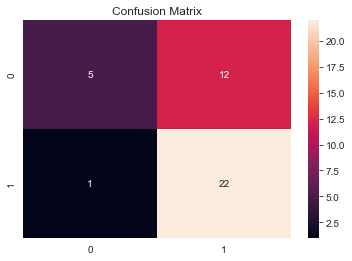

In [303]:
from sklearn.svm import SVC
SVCmodel = SVC(kernel='linear',probability=True)
SVCmodel.fit(x_train, y_train)
y_pred_svc=model_evaluation(SVCmodel,)

### Model-4 KNN

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.60      0.78      0.68        23

    accuracy                           0.57        40
   macro avg       0.55      0.54      0.52        40
weighted avg       0.56      0.57      0.55        40

Train accuracy =74.38%
Test accuracy =57.50%


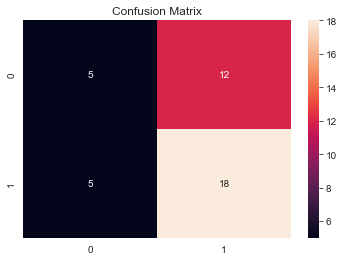

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
y_pred_knn=model_evaluation(knn)

### Model-5 DecisionTreeClassifier

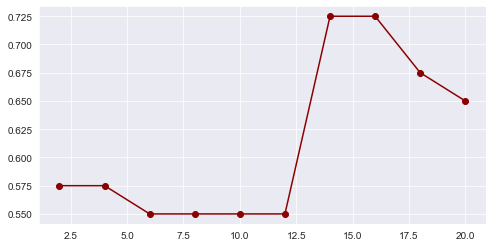

In [305]:
from sklearn.tree import DecisionTreeClassifier
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

              precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       0.67      0.78      0.72        23

    accuracy                           0.65        40
   macro avg       0.64      0.63      0.63        40
weighted avg       0.64      0.65      0.64        40

Train accuracy =100.00%
Test accuracy =65.00%


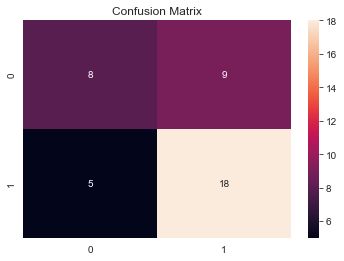

In [306]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_DT=model_evaluation(dtree)

### Creating an Ensemble of Classifiers

In [316]:
from sklearn.ensemble import VotingClassifier
# Ensemble of models
estimator = []
estimator.append(('LR',LRmodel))
estimator.append(('DT',dtree))
estimator.append(('knn',knn))
estimator.append(('SVC',SVCmodel))
estimator.append(('cNB',cnb))

              precision    recall  f1-score   support

           0       0.71      0.29      0.42        17
           1       0.64      0.91      0.75        23

    accuracy                           0.65        40
   macro avg       0.68      0.60      0.58        40
weighted avg       0.67      0.65      0.61        40

Train accuracy =99.38%
Test accuracy =65.00%


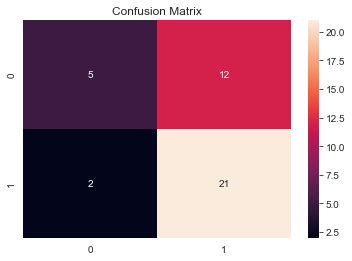

In [317]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred_vot_hard=model_evaluation(vot_hard)

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.69      0.87      0.77        23

    accuracy                           0.70        40
   macro avg       0.71      0.67      0.67        40
weighted avg       0.71      0.70      0.69        40

Train accuracy =100.00%
Test accuracy =70.00%


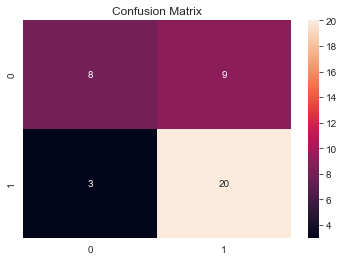

In [318]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred_vot_soft=model_evaluation(vot_soft)

## Predicting for reddit_sentences_300

In [270]:
reddit_sentences_300

,sentences
200,"[says, care, state, theres, point, staying, to..."
201,"[create, stories, minds, feel, sense, control,..."
202,"[dont, qualify, fitting, dsm5, diagnosis, sad,..."
203,"[going, work, every, day, outside, comfort, zo..."
204,"[ive, calls, past, ive, answered, even, though..."
...,...
495,"[im, depressed, believe, major, depressin, han..."
496,"[last, day, yesterday, broke, years, long, str..."
497,"[often, fear, panic, attacks, makes, problem, ..."
498,"[much, writing, always, outlet, im, proud, awh..."


In [273]:
reddit_sentences=reddit_sentences_300['sentences'].apply(lambda x: ' '.join(x))

In [274]:
reddit_300_vector= vectoriser.transform(reddit_sentences)

In [275]:
y_pred_300 = cnb.predict(reddit_300_vector)

In [276]:
y_pred_300

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [278]:
reddit_sentences["Anxious"] = 

In [283]:
reddit_sentences_300["Anxious"] = y_pred_300

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [285]:
reddit_sentences_300.head()

,sentences,Anxious
200,"[says, care, state, theres, point, staying, to...",0
201,"[create, stories, minds, feel, sense, control,...",1
202,"[dont, qualify, fitting, dsm5, diagnosis, sad,...",1
203,"[going, work, every, day, outside, comfort, zo...",1
204,"[ive, calls, past, ive, answered, even, though...",1


In [ ]:
reddit_sentences_300